## Ham & Spam Data Preprocessing and Classification By Multinomial-NB Model

In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data Preprocessing


1. Data Cleaning
2. Exploratory Data Analysis(EDA)
3. Text Preprocessing & Purification

# 1. Data Cleaning

a. Drop Null Columns

In [5]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


b. Renaming Columns

In [7]:
df=df.rename(columns={'v1':'target','v2':'text'})
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


c. Binary Classification On Target

In [8]:

from sklearn.preprocessing import LabelEncoder

In [9]:
encoder=LabelEncoder()
df.target=encoder.fit_transform(df.target)

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


d. Removing Null Values

In [11]:
df.isnull().sum()   #No Null Values


target    0
text      0
dtype: int64

e. Removing Dublicate Values

In [12]:
df.duplicated().sum()

403

In [13]:
df=df.drop_duplicates(keep='first')
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.shape

(5169, 2)

In [15]:
df.duplicated().sum()

0

# 2. Exploratory Data Analysis(EDA)

In [16]:
value_counts=df.target.value_counts()
value_counts

0    4516
1     653
Name: target, dtype: int64

a. PIE Chart Plotting

In [17]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

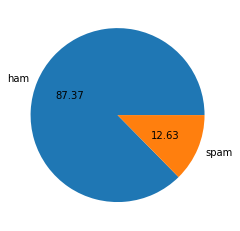

In [18]:
plt.pie(value_counts,labels=['ham','spam'],autopct='%0.2f')
plt.show

b. Seperation of number of Words, Characters and Sentences

In [19]:
df['no_of_characters']=df['text'].apply(len)
df.head()


,target,text,no_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
df['no_of_words']=df['text'].apply(lambda x:len(x.split(' ')))
df.head()

,target,text,no_of_characters,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [21]:
df["no_of_sentences"]=df['text'].apply(lambda x: len(x.split('.')))
df.head()

,target,text,no_of_characters,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9
1,0,Ok lar... Joking wif u oni...,29,6,7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,7
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


c. Words Tokenization

In [22]:
import nltk

In [23]:
nltk.download('punkt') #using for tokenization of words and sentences etc...

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [24]:
df['words_tokenization']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,no_of_characters,no_of_words,no_of_sentences,words_tokenization
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,24
1,0,Ok lar... Joking wif u oni...,29,6,7,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,37
3,0,U dun say so early hor... U c already then say...,49,11,7,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,15


In [25]:
df['sentences_tokenization']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,no_of_characters,no_of_words,no_of_sentences,words_tokenization,sentences_tokenization
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,24,2
1,0,Ok lar... Joking wif u oni...,29,6,7,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,37,2
3,0,U dun say so early hor... U c already then say...,49,11,7,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,15,1


In [26]:
# stats behind all new added columns
df[['no_of_characters','words_tokenization','sentences_tokenization']].describe()

,no_of_characters,words_tokenization,sentences_tokenization
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
# stats behind all new added columns in ham
df[df['target']==0].describe()

,target,no_of_characters,no_of_words,no_of_sentences,words_tokenization,sentences_tokenization
count,4516.0,4516.000000,4516.000000,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,14.259743,2.916519,17.120903,1.799601
std,0.0,56.358207,11.231781,2.638732,13.493725,1.278465
min,0.0,2.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0,34.000000,7.000000,1.000000,8.000000,1.000000
50%,0.0,52.000000,11.000000,2.000000,13.000000,1.000000
75%,0.0,90.000000,19.000000,4.000000,22.000000,2.000000
max,0.0,910.000000,171.000000,42.000000,220.000000,28.000000


In [28]:
# stats behind specifiied columns in ham
df[df['target']==0][['no_of_characters','words_tokenization','sentences_tokenization']].describe() 


,no_of_characters,words_tokenization,sentences_tokenization
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
# stats behind all new added columns in spam
df[df['target']==1].describe()

,target,no_of_characters,no_of_words,no_of_sentences,words_tokenization,sentences_tokenization
count,653.0,653.000000,653.000000,653.000000,653.000000,653.000000
mean,1.0,137.891271,23.728943,3.055130,27.667688,2.967841
std,0.0,30.137753,5.985799,1.725848,7.008418,1.483201
min,1.0,13.000000,2.000000,1.000000,2.000000,1.000000
25%,1.0,132.000000,22.000000,2.000000,25.000000,2.000000
50%,1.0,149.000000,25.000000,3.000000,29.000000,3.000000
75%,1.0,157.000000,28.000000,4.000000,32.000000,4.000000
max,1.0,224.000000,35.000000,14.000000,46.000000,8.000000


In [30]:
# stats behind specifiied columns in spam
df[df['target']==1][['no_of_characters','words_tokenization','sentences_tokenization']].describe()

,no_of_characters,words_tokenization,sentences_tokenization
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


d. Histogram Plotting

In [31]:
import seaborn as sns


<AxesSubplot:xlabel='no_of_characters', ylabel='Count'>

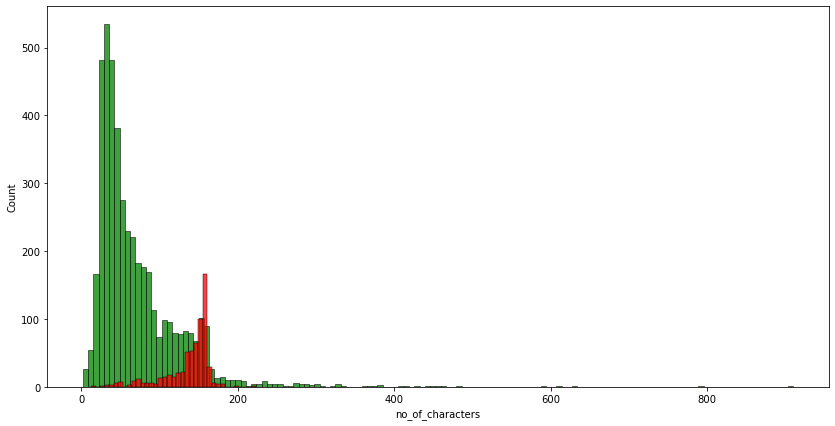

In [32]:
plt.figure(figsize=(14,7))
sns.histplot(df[df['target']==0]['no_of_characters'],color='Green')
sns.histplot(df[df['target']==1]['no_of_characters'],color='Red')

<AxesSubplot:xlabel='words_tokenization', ylabel='Count'>

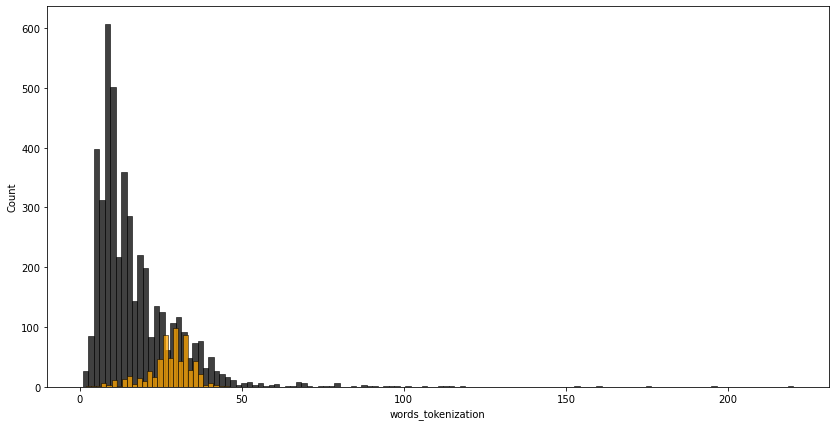

In [33]:
plt.figure(figsize=(14,7))
sns.histplot(df[df['target']==0]['words_tokenization'],color='black')
sns.histplot(df[df['target']==1]['words_tokenization'],color='orange')

<AxesSubplot:xlabel='sentences_tokenization', ylabel='Count'>

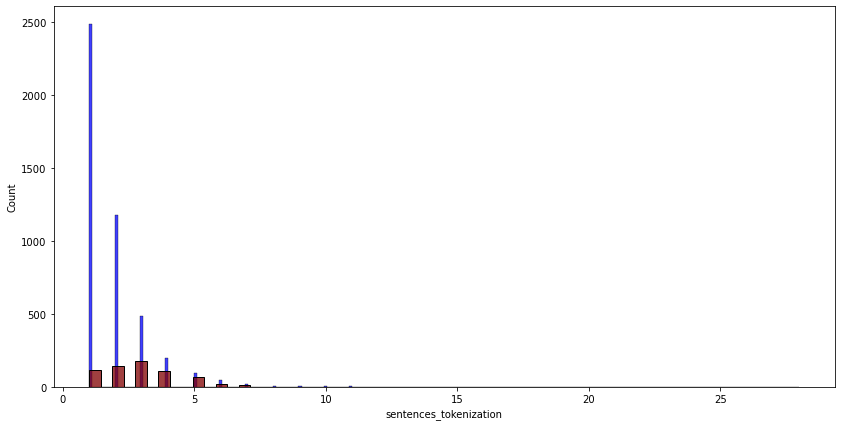

In [34]:
plt.figure(figsize=(14,7))
sns.histplot(df[df['target']==0]['sentences_tokenization'],color='BLUE')
sns.histplot(df[df['target']==1]['sentences_tokenization'],color='maroon')

e. Pair Plotting

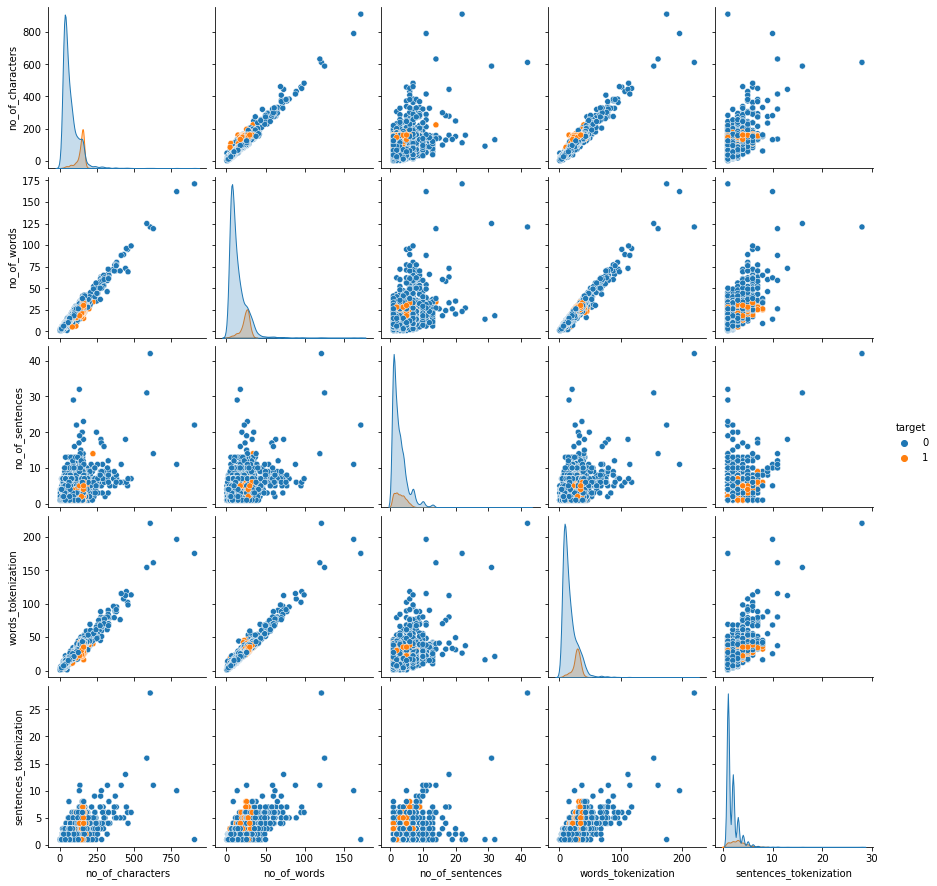

In [35]:
sns.pairplot(df,hue='target')  #Pair Plotting defines the correlation between ham & spam in target column

In [36]:
df.corr() #correlation of every row with another column

,target,no_of_characters,no_of_words,no_of_sentences,words_tokenization,sentences_tokenization
target,1.000000,0.384717,0.281818,0.018118,0.262984,0.284901
no_of_characters,0.384717,1.000000,0.974219,0.428390,0.965770,0.638143
no_of_words,0.281818,0.974219,1.000000,0.410364,0.979444,0.642457
no_of_sentences,0.018118,0.428390,0.410364,1.000000,0.465198,0.423312
words_tokenization,0.262984,0.965770,0.979444,0.465198,1.000000,0.684541
sentences_tokenization,0.284901,0.638143,0.642457,0.423312,0.684541,1.000000


In [37]:
df['target'].corr(df['words_tokenization'])

0.2629835742852427

In [38]:
df['words_tokenization'].corr(df['sentences_tokenization'])

0.6845408831149301

<AxesSubplot:>

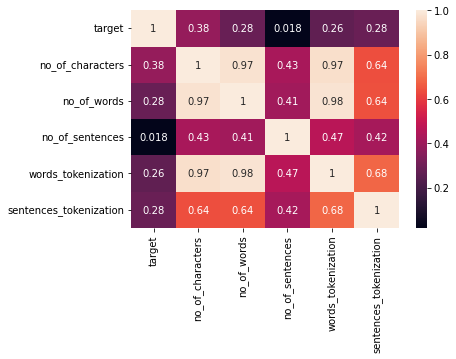

In [39]:
sns.heatmap(df.corr(),annot=True)    #heatmap shows the correlation of each column with another columns in suitable form

# Data Preprocessing


- convert all text in lower case
- Tokenization
- Remove Special characters
- Removing stopwords & punctuation 
- Stemming

In [40]:
#Stopwords

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [41]:
#Punctuations

import string
punctuations=string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
#Stemming

from nltk.stem.porter import PorterStemmer
stemming=PorterStemmer()
stemming.stem('beautiful')

'beauti'

In [43]:
# Function for Text Transformation

def text_transformation(text):
    
    #changing text in lower case
    text=text.lower()
    
    lst=[]
    
    #Tokenization
    text=nltk.word_tokenize(text)
    
    #Removing special characters
    
    for i in text:
        if i.isalnum():
            lst.append(i)
    text=lst[:]
    lst.clear()
    
    #Removing stopwords & Punctuations
    
    for i in text:
        if(i not in stopwords) and(i not in punctuations):
            lst.append(i)
    text=lst[:]
    lst.clear()
    
    #Stemming
    
    for i in text:
        lst.append(stemming.stem(i))
    
    return " ".join(lst)

In [44]:
#testing of text transformation function

text_transformation('I am Abdul Rehman I am Realizing ,,,;;;///')

'abdul rehman realiz'

In [45]:
#Applying function on text column

df['transformed_text']=df['text'].apply(text_transformation)
df.head()

,target,text,no_of_characters,no_of_words,no_of_sentences,words_tokenization,sentences_tokenization,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,7,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,7,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,15,1,nah think goe usf live around though


# Word Cloud

In [46]:
%pip install wordcloud
from wordcloud import WordCloud

Note: you may need to restart the kernel to use updated packages.


In [47]:
wc=WordCloud(width=800,height=400,max_font_size=100,background_color='white')


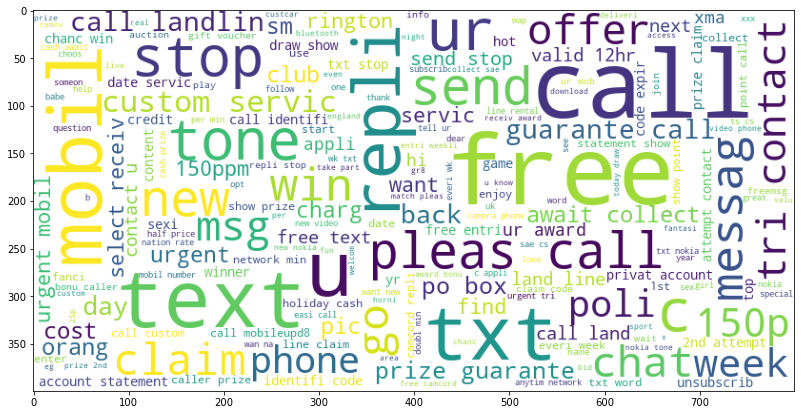

In [48]:
spam_word_cloud=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(14,7))
plt.imshow(spam_word_cloud)

In [49]:
wc=WordCloud(width=800,height=400,max_font_size=100,background_color='white')



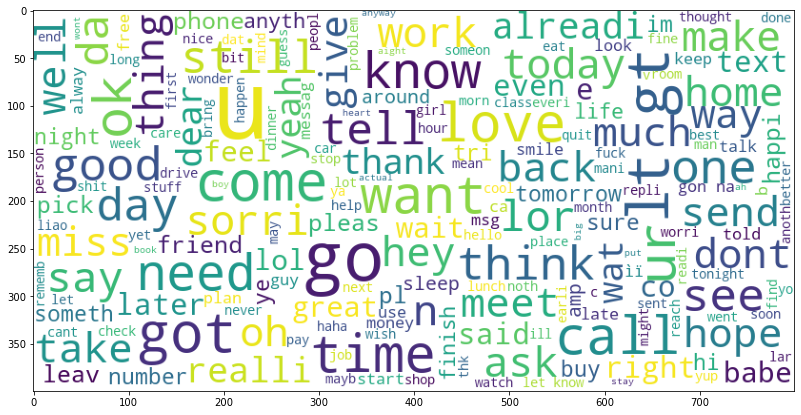

In [50]:
ham_word_cloud=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(14,7))
plt.imshow(ham_word_cloud)

In [51]:
import re

In [52]:
def cleaning_text(txt):
    txt=re.sub(r'[^\w\s]','',txt)
    txt=txt.lower()
    txt=re.sub(r'\d+','',txt)
    txt=txt.strip()
    
    return(txt)

In [53]:
df['transformed_text']=df['transformed_text'].apply(cleaning_text)

In [54]:
df.head()

,target,text,no_of_characters,no_of_words,no_of_sentences,words_tokenization,sentences_tokenization,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,7,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,37,2,free entri wkli comp win fa cup final tkt st ...
3,0,U dun say so early hor... U c already then say...,49,11,7,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,15,1,nah think goe usf live around though


In [55]:
import nltk

In [56]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [57]:
def txt_tokenizer(txt):
    return word_tokenize(txt)

In [58]:
df['transformed_text']=df['transformed_text'].apply(txt_tokenizer)

In [59]:
df.head()

,target,text,no_of_characters,no_of_words,no_of_sentences,words_tokenization,sentences_tokenization,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,6,7,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,37,2,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,0,U dun say so early hor... U c already then say...,49,11,7,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,15,1,"[nah, think, goe, usf, live, around, though]"


In [60]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
stop_words = list(stopwords.words('english'))
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [62]:
from nltk.stem import PorterStemmer
stemming=PorterStemmer()

In [63]:
df['transformed_text']=df['transformed_text'].apply(lambda x: [stemming.stem(i) for i in x])

In [64]:
df.head()

,target,text,no_of_characters,no_of_words,no_of_sentences,words_tokenization,sentences_tokenization,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,6,7,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,37,2,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,0,U dun say so early hor... U c already then say...,49,11,7,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,15,1,"[nah, think, goe, usf, live, around, though]"


In [65]:
df['transformed_text'] = df['transformed_text'].apply(lambda x:" ".join( [word for word in x if word.lower() not in stop_words]))


In [66]:
df.head()

,target,text,no_of_characters,no_of_words,no_of_sentences,words_tokenization,sentences_tokenization,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,7,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,11,7,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,15,1,nah think goe usf live around though


In [67]:
df.drop(['text','no_of_characters','no_of_words','no_of_sentences','words_tokenization','sentences_tokenization'],axis=1,inplace=True)

In [68]:
df.head()

,target,transformed_text
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
encoder=OneHotEncoder()

In [71]:
one_hot_text_data=encoder.fit_transform(df[['transformed_text']])
df['transformed_text'] = one_hot_text_data.toarray()

In [72]:
df

,target,transformed_text
0,0,0.0
1,0,0.0
2,1,0.0
3,0,0.0
4,0,0.0
...,...,...
5567,1,0.0
5568,0,0.0
5569,0,0.0
5570,0,0.0


In [73]:
df.shape

(5169, 2)

In [74]:
x=df['target']
y=df['transformed_text']

In [75]:
x.shape

(5169,)

In [76]:
x=x.values.reshape(5169,1)

In [77]:
y.shape

(5169,)

In [78]:
y=y.values.reshape(5169,1)

In [101]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [103]:
model=MultinomialNB()


In [104]:
model.fit(x_train,y_train)


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [92]:
predictions=model.predict(x_test)

In [105]:
from sklearn.metrics import accuracy_score

In [109]:
accuracy=model.score(x_test,y_test)*100
accuracy

99.90328820116055